In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
from load import load_data
from load import train_test_split
from load import get_measures


import warnings # retirar avisos
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 5

In [2]:
df = load_data()
df["load_mwmed"].interpolate(method = "linear", inplace = True)

In [3]:
n_test = 15
train, test = train_test_split(df, n_test)
train

fit1 = ExponentialSmoothing(train ,seasonal_periods=7,trend='add', seasonal='add',).fit()
y_hat = fit1.forecast(1)
y_hat

8173    11919.43815
dtype: float64

In [8]:
fit1.params

{'smoothing_level': 0.7121428571428572,
 'smoothing_trend': 0.02967261904761905,
 'smoothing_seasonal': 0.07676190476190475,
 'damping_trend': nan,
 'initial_level': 6322.41123015952,
 'initial_trend': 78.97023088003506,
 'initial_seasons': array([ -489.59845025, -1352.96928359,   192.08339498,   450.57730867,
          407.57312712,   409.46241284,   382.87149022]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

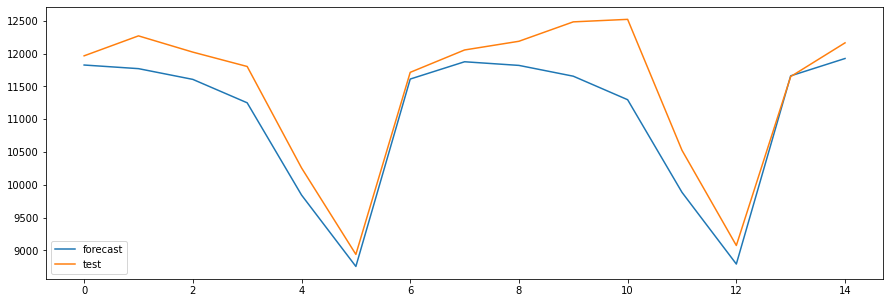

In [10]:
n_test = 15
train, test = train_test_split(df, n_test)
train

fit1 = ExponentialSmoothing(train ,seasonal_periods=7,trend='add', seasonal='mul',).fit()
y_hat = fit1.forecast(n_test)

plt.plot(y_hat.reset_index(drop = True), label = "forecast")
plt.plot(test.load_mwmed.reset_index(drop = True), label = "test")
plt.legend()
plt.show()

In [11]:
y_hat

8173    11824.801739
8174    11769.539797
8175    11605.796232
8176    11249.002548
8177     9843.541086
8178     8754.835407
8179    11610.937477
8180    11874.466386
8181    11818.942699
8182    11654.482623
8183    11296.163924
8184     9884.785371
8185     8791.496088
8186    11659.528954
8187    11924.131034
dtype: float64

In [12]:
medidas_fc = get_measures(y_hat, test.load_mwmed) 
df_medidas_fc = pd.DataFrame([medidas_fc])
df_medidas_fc

,erro,mae,mse,rmse,mape,smape
0,3.863843e+06,405.410422,257589.522127,507.532779,0.035019,3.596646
